# EDA for Sprocket - KPMG Internship
Data Cleaning

Data Exploration

Model Development

Interpretation

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime as dt
print("Libraries imported")

Libraries imported


# 1. Data Cleaning on Customer Demographic Data set

In [84]:
filename = 'KPMG_VI_New_raw_data_update_final.xlsx'
print(pd.ExcelFile(filename).sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [85]:
cust_demo_df = pd.read_excel(filename, header = 1, sheet_name = 'CustomerDemographic', index_col = 0)
cust_demo_df.head()

first_name  last_name  gender  \
customer_id                                      
1                   Laraine  Medendorp       F   
2                       Eli    Bockman    Male   
3                     Arlin     Dearle    Male   
4                    Talbot        NaN    Male   
5            Sheila-kathryn     Calton  Female   

             past_3_years_bike_related_purchases        DOB  \
customer_id                                                   
1                                             93 1953-10-12   
2                                             81 1980-12-16   
3                                             61 1954-01-20   
4                                             33 1961-10-03   
5                                             56 1977-05-13   

                          job_title job_industry_category     wealth_segment  \
customer_id                                                                    
1               Executive Secretary                Health      Mass Customer   
2            Administrative Officer    Financial Services      Mass Customer   
3                Recruiting Manager              Property      Mass Customer   
4                               NaN                    IT      Mass Customer   
5                     Senior Editor                   NaN  Affluent Customer   

            deceased_indicator  \
customer_id                      
1                            N   
2                            N   
3                            N   
4                            N   
5                            N   

                                                       default owns_car  \
customer_id                                                               
1                                                           "'      Yes   
2                                 <script>alert('hi')</script>      Yes   
3                                          2018-02-01 00:00:00      Yes   
4            () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No   
5                                                          NIL      Yes   

             tenure  
customer_id          
1              11.0  
2              16.0  
3              15.0  
4               7.0  
5               8.0

In [86]:
# Dropping first_name, last_name, job_title, default which don't have any direct impact on buying decision
cust_demo_df.drop(['first_name', 'last_name', 'job_title', 'default'], inplace = True, axis = 1)
cust_demo_df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1                 F                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment deceased_indicator  \
customer_id                                                               
1                          Health      Mass Customer                  N   
2              Financial Services      Mass Customer                  N   
3                        Property      Mass Customer                  N   
4                              IT      Mass Customer                  N   
5                             NaN  Affluent Customer                  N   

            owns_car  tenure  
customer_id                   
1                Yes    11.0  
2                Yes    16.0  
3                Yes    15.0  
4                 No     7.0  
5                Yes     8.0

In [87]:
### Making Gender feature consistent
cust_demo_df.gender.value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [88]:
cust_demo_df['gender'] = cust_demo_df.gender.replace('Femal', 'Female').replace('F', 'Female').replace('M', 'Male').replace('U', 'Unspecified')
cust_demo_df.gender.value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [89]:
### Converting Categorical features into integer values
cust_demo_df['deceased_indicator'].replace('N', 0, inplace = True)
cust_demo_df['deceased_indicator'].replace('Y', 1, inplace = True)
cust_demo_df['owns_car'].replace('Yes', 1, inplace = True)
cust_demo_df['owns_car'].replace('No', 0, inplace = True)
cust_demo_df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment  deceased_indicator  \
customer_id                                                                
1                          Health      Mass Customer                   0   
2              Financial Services      Mass Customer                   0   
3                        Property      Mass Customer                   0   
4                              IT      Mass Customer                   0   
5                             NaN  Affluent Customer                   0   

             owns_car  tenure  
customer_id                    
1                   1    11.0  
2                   1    16.0  
3                   1    15.0  
4                   0     7.0  
5                   1     8.0

In [90]:
###Considering only data for people alive
####selecting rows only who are alive
cust_demo_df = cust_demo_df[cust_demo_df["deceased_indicator"] == 0]
##dropping the deceased indicator as we have already filtered only who are alive
cust_demo_df.drop('deceased_indicator', inplace = True, axis = 1)

In [91]:
cust_demo_df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment  owns_car  tenure  
customer_id                                                             
1                          Health      Mass Customer         1    11.0  
2              Financial Services      Mass Customer         1    16.0  
3                        Property      Mass Customer         1    15.0  
4                              IT      Mass Customer         0     7.0  
5                             NaN  Affluent Customer         1     8.0

In [92]:
## calculating age
cust_demo_df['age'] = (dt.datetime.now() - cust_demo_df['DOB']) / np.timedelta64(1, 'Y')
cust_demo_df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment  owns_car  tenure  \
customer_id                                                              
1                          Health      Mass Customer         1    11.0   
2              Financial Services      Mass Customer         1    16.0   
3                        Property      Mass Customer         1    15.0   
4                              IT      Mass Customer         0     7.0   
5                             NaN  Affluent Customer         1     8.0   

                   age  
customer_id             
1            67.060133  
2            39.880930  
3            66.786342  
4            59.084609  
5            43.475802

In [93]:
## dropping rows which have null DOB
cust_demo_df.dropna(subset = ['DOB'], inplace = True)

## calculating age_class
cust_demo_df['age_class'] = ((round(cust_demo_df['age'] / 10)) * 10).astype(int)

cust_demo_df.isnull().sum()


gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_industry_category                  656
wealth_segment                           0
owns_car                                 0
tenure                                   0
age                                      0
age_class                                0
dtype: int64

In [94]:
cust_demo_df.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
3              Male                                   61 1954-01-20   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   

            job_industry_category     wealth_segment  owns_car  tenure  \
customer_id                                                              
1                          Health      Mass Customer         1    11.0   
2              Financial Services      Mass Customer         1    16.0   
3                        Property      Mass Customer         1    15.0   
4                              IT      Mass Customer         0     7.0   
5                             NaN  Affluent Customer         1     8.0   

                   age  age_class  
customer_id                        
1            67.060133         70  
2            39.880930         40  
3            66.786342         70  
4            59.084609         60  
5            43.475802         40

#### As part of cleaning performed below operations

Dropped features which don't effect in any way the target feature.

Converted categorical features into integer 

Converted inconsistent values in features to consistent

Dropped rows which have missing DOB

Create new features like age and age_class

# 2. Data Cleaning on Customer Address Data Set

In [95]:
# reading the dataset into a Data Frame
cust_addr_df = pd.read_excel(filename, header = 1, sheet_name = 'CustomerAddress', index_col = 0)
cust_addr_df.head()

address  postcode            state    country  \
customer_id                                                              
1             060 Morning Avenue      2016  New South Wales  Australia   
2            6 Meadow Vale Court      2153  New South Wales  Australia   
4             0 Holy Cross Court      4211              QLD  Australia   
5            17979 Del Mar Point      2448  New South Wales  Australia   
6               9 Oakridge Court      3216              VIC  Australia   

             property_valuation  
customer_id                      
1                            10  
2                            10  
4                             9  
5                             4  
6                             9

In [96]:
cust_addr_df.drop(['country'], axis = 1, inplace = True)

In [97]:
cust_addr_df['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [98]:
### Converting incosistent values to consistent
cust_addr_df['state'].replace('New South Wales', 'NSW', inplace = True)
cust_addr_df['state'].replace('Victoria', 'VIC', inplace = True)
cust_addr_df['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [99]:
##checking null values
cust_addr_df.isnull().sum()

address               0
postcode              0
state                 0
property_valuation    0
dtype: int64

As part of cleaning on customer address dataset, converted inconsistent values to consistent

# 3. Merging Customer Demographic Data set and customer address dataset

Perfomed inner join on datasets 

In [100]:
demo_addr = pd.merge(cust_demo_df, cust_addr_df, left_index = True, right_index = True)
demo_addr.head()

gender  past_3_years_bike_related_purchases        DOB  \
customer_id                                                           
1            Female                                   93 1953-10-12   
2              Male                                   81 1980-12-16   
4              Male                                   33 1961-10-03   
5            Female                                   56 1977-05-13   
6              Male                                   35 1966-09-16   

            job_industry_category     wealth_segment  owns_car  tenure  \
customer_id                                                              
1                          Health      Mass Customer         1    11.0   
2              Financial Services      Mass Customer         1    16.0   
4                              IT      Mass Customer         0     7.0   
5                             NaN  Affluent Customer         1     8.0   
6                          Retail     High Net Worth         1    13.0   

                   age  age_class              address  postcode state  \
customer_id                                                              
1            67.060133         70   060 Morning Avenue      2016   NSW   
2            39.880930         40  6 Meadow Vale Court      2153   NSW   
4            59.084609         60   0 Holy Cross Court      4211   QLD   
5            43.475802         40  17979 Del Mar Point      2448   NSW   
6            54.131736         50     9 Oakridge Court      3216   VIC   

             property_valuation  
customer_id                      
1                            10  
2                            10  
4                             9  
5                             4  
6                             9

# 4. Data Cleaning on Transaction Dataset

In [101]:
# reading transactions data and storing in a DataFrame
cust_trans_df = pd.read_excel(filename, header = 1,  sheet_name = 'Transactions', index_col = 0)
cust_trans_df = cust_trans_df.sort_values('customer_id')
cust_trans_df.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   
16423                medium      742.54         667.40   
5157                  small     1720.70        1531.42   
13424                medium       71.49          53.62   

                product_first_sold_date  
transaction_id                           
14486                           33455.0  
18970                           35378.0  
16423                           37838.0  
5157                            37823.0  
13424                           38573.0

In [102]:
## checking for null values
cust_trans_df.isnull().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [103]:
# checking for duplicate rows
cust_trans_df.duplicated().sum()

0

In [104]:
cust_trans_df.shape

(20000, 12)

In [105]:
# converting product_first_sold_date from float to datetime, unit = d gives only date 
### to_datetime doesn't work here as it is giving same date for all values
cust_trans_df['product_first_sold_date'] = pd.TimedeltaIndex(cust_trans_df['product_first_sold_date'], unit = 'd') + dt.datetime(1900,1,1)
#cust_trans_df['product_first_sold_date'].head()
#pd.TimedeltaIndex(cust_trans_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
cust_trans_df.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost product_first_sold_date  
transaction_id                                                                  
14486                 small      688.63         612.88              1991-08-07  
18970                medium     1274.93         764.96              1996-11-11  
16423                medium      742.54         667.40              2003-08-07  
5157                  small     1720.70        1531.42              2003-07-23  
13424                medium       71.49          53.62              2005-08-11

In [106]:
cust_trans_df.dropna(inplace = True)
cust_trans_df.shape

(19445, 12)

In [107]:
cust_trans_df['transaction_date'].describe()

count                   19445
unique                    364
top       2017-02-14 00:00:00
freq                       81
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [108]:
###Creating new features last purchase days ago and profit
most_recent_purchase = cust_trans_df['transaction_date'].max()
# difference gives in days ... converting that into integer
cust_trans_df['last_purchase_days_ago'] = (most_recent_purchase - cust_trans_df['transaction_date']) / np.timedelta64(1, 'D')
cust_trans_df['profit'] = cust_trans_df['list_price'] - cust_trans_df['standard_cost']
cust_trans_df.head()

product_id  customer_id transaction_date  online_order  \
transaction_id                                                           
14486                   23            1       2017-03-27           0.0   
18970                   11            1       2017-03-29           1.0   
16423                    9            1       2017-12-09           1.0   
5157                    47            1       2017-05-11           1.0   
13424                    2            1       2017-02-21           0.0   

               order_status           brand product_line product_class  \
transaction_id                                                           
14486              Approved  Norco Bicycles     Mountain           low   
18970              Approved  Giant Bicycles     Standard          high   
16423              Approved      OHM Cycles         Road        medium   
5157               Approved   Trek Bicycles         Road           low   
13424              Approved           Solex     Standard        medium   

               product_size  list_price  standard_cost  \
transaction_id                                           
14486                 small      688.63         612.88   
18970                medium     1274.93         764.96   
16423                medium      742.54         667.40   
5157                  small     1720.70        1531.42   
13424                medium       71.49          53.62   

               product_first_sold_date  last_purchase_days_ago  profit  
transaction_id                                                          
14486                       1991-08-07                   278.0   75.75  
18970                       1996-11-11                   276.0  509.97  
16423                       2003-08-07                    21.0   75.14  
5157                        2003-07-23                   233.0  189.28  
13424                       2005-08-11                   312.0   17.87

In [109]:
# considering only 1 year data
cust_trans_df[cust_trans_df['last_purchase_days_ago'] > 365].shape

(0, 14)

# 5. RFM Analysis

In [110]:
### Implementing RFM Analysis (Recency, Frequency,  Monetary Value) - best technique for marketing industry
rfmTable = cust_trans_df.groupby('customer_id').agg(
{
    'last_purchase_days_ago': lambda x:  x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})
rfmTable.head()

last_purchase_days_ago  customer_id   profit
customer_id                                              
1                               7.0           11  3018.09
2                             128.0            3  2226.26
3                             102.0            7  3290.21
4                             195.0            2   220.57
5                              16.0            6  2394.94

In [111]:
### renaming columns
rfmTable.rename(columns = {
    'last_purchase_days_ago': 'recency',
    'customer_id': 'frequency',
    'profit': 'monetary_value'
}, inplace = True)
rfmTable.head()

recency  frequency  monetary_value
customer_id                                    
1                7.0         11         3018.09
2              128.0          3         2226.26
3              102.0          7         3290.21
4              195.0          2          220.57
5               16.0          6         2394.94

In [112]:
rfmTable.shape

(3492, 3)

In [113]:
### Calculating qunatile on rfm data, dividing data into 4 equal parts <0.25, 0.25-0.5, 0.5-0.75, >0.75
quartile = rfmTable.quantile(q = [0.25, 0.5, 0.75])
quartile

recency  frequency  monetary_value
0.25     18.0        4.0         1797.43
0.50     45.0        5.0         2798.99
0.75     88.0        7.0         4122.44

In [114]:
### creating function to generate scores for recency, frequency and monetary_value based on the quantile values
### 1 being highest and 4 being lowest
##### Recency (least recency), frequency, monetary_value(highest)
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


In [115]:
### creating segment bin values based to RFM table usiing quartile on rscore, fscore, mscore
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args = ('recency', quartile))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args = ('frequency', quartile))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args = ('monetary_value', quartile))
rfmSeg.head()

recency  frequency  monetary_value  r_score  f_score  m_score
customer_id                                                               
1                7.0         11         3018.09        1        1        2
2              128.0          3         2226.26        4        4        3
3              102.0          7         3290.21        4        2        2
4              195.0          2          220.57        4        4        4
5               16.0          6         2394.94        1        2        3

In [116]:
### calculatin the total score using std formual r*100 + f*10 + m - for future segementation of customers
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] =  rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

recency  frequency  monetary_value  r_score  f_score  m_score  \
customer_id                                                                  
1                7.0         11         3018.09        1        1        2   
2              128.0          3         2226.26        4        4        3   
3              102.0          7         3290.21        4        2        2   
4              195.0          2          220.57        4        4        4   
5               16.0          6         2394.94        1        2        3   

             rfm_class  total_score  
customer_id                          
1                  112            4  
2                  443           11  
3                  422            8  
4                  444           12  
5                  123            6

In [117]:
### creating quartiles for segmenting based on rfm_class
rfm_quartiles  = (rfmSeg['rfm_class'].min(),rfmSeg['rfm_class'].quantile(q = 0.25), 
                  rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q = 0.75))
rfm_quartiles

(111, 144.0, 244.0, 344.0)

In [118]:
### creating function for segmenting
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]:
        return 'bronze'
    else:
        return 'basic'

In [119]:
### applying function on the table

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args = ('rfm_class', rfm_quartiles))
rfmSeg.head()

recency  frequency  monetary_value  r_score  f_score  m_score  \
customer_id                                                                  
1                7.0         11         3018.09        1        1        2   
2              128.0          3         2226.26        4        4        3   
3              102.0          7         3290.21        4        2        2   
4              195.0          2          220.57        4        4        4   
5               16.0          6         2394.94        1        2        3   

             rfm_class  total_score customer_title  
customer_id                                         
1                  112            4         silver  
2                  443           11          basic  
3                  422            8          basic  
4                  444           12          basic  
5                  123            6         silver

In [120]:
## merging all the 3 datasets, address and demo are already merged into 

addr_demo_trans = pd.merge(rfmSeg, demo_addr, left_index = True, right_index = True)
addr_demo_trans.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'property_valuation'],
      dtype='object')

In [121]:
addr_demo_trans.shape

(3410, 22)

# 6. Exploratory Data Analysis

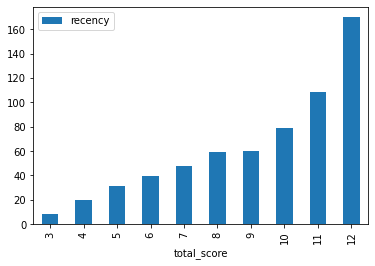

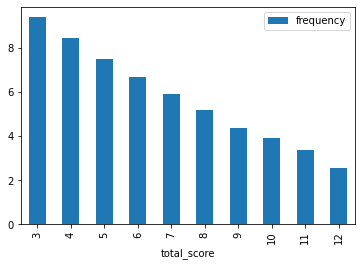

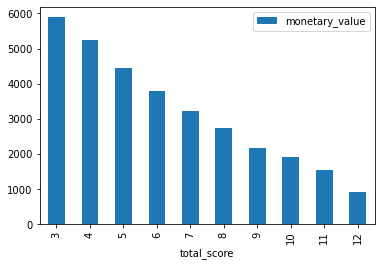

In [122]:
### exploring the distribution pattern of recency, frequency and monetary_value 
addr_demo_trans.groupby('total_score').agg('recency').mean().to_frame().plot(kind = 'bar')
addr_demo_trans.groupby('total_score').agg('frequency').mean().to_frame().plot(kind = 'bar')
addr_demo_trans.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind = 'bar')
plt.show()

Based on the above 3 graphs it is identified that lesser the score - recency value is low and frequency and monetray value are high

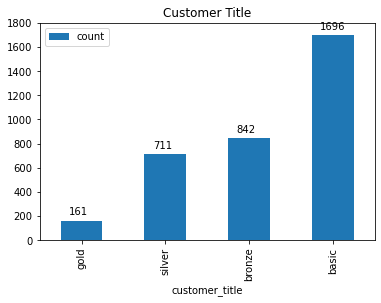

In [123]:
### exploring the distribution based on customer title
customer_titles_df = addr_demo_trans.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

We have identified that GOLD are the customers who are recent, high frequency and high monetray_value and basic on the contrary have high recency and low frequent and low monetary_value these are the customers which need to be focused.

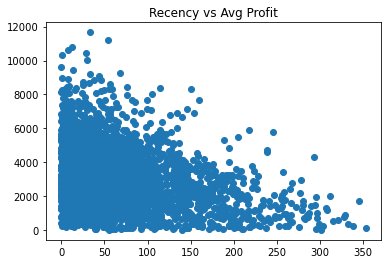

In [124]:
### understanding the distribution across R, M
plt.scatter(addr_demo_trans['recency'], addr_demo_trans['monetary_value'])
plt.title('Recency vs Avg Profit')
plt.show()

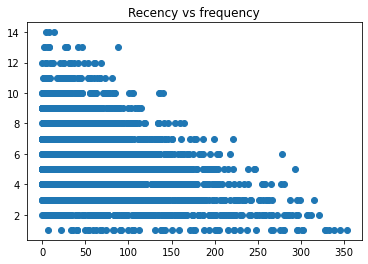

In [125]:
### understanding the distribution across R, F
plt.scatter(addr_demo_trans['recency'], addr_demo_trans['frequency'])
plt.title('Recency vs frequency')
plt.show()

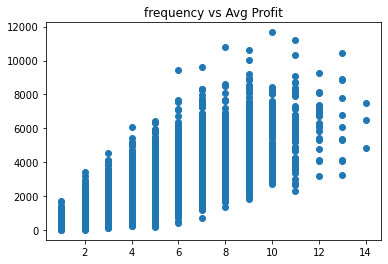

In [126]:
### understanding the distribution across F, M
plt.scatter(addr_demo_trans['frequency'], addr_demo_trans['monetary_value'])
plt.title('frequency vs Avg Profit')
plt.show()

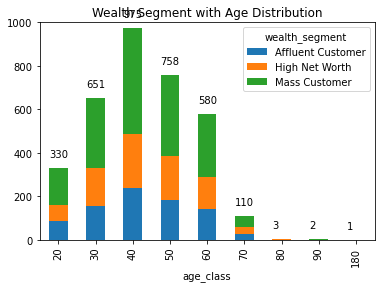

In [127]:
### Wealth Segment with age distribution
addr_demo_trans.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_trans.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

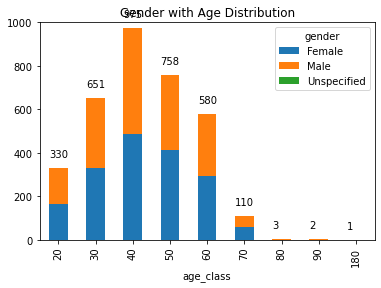

In [128]:
### Gender with Age distribution
addr_demo_trans.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_trans.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Gender with Age Distribution')
plt.show()

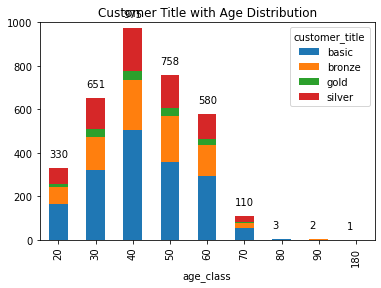

In [129]:
### customer Title with age distribution
addr_demo_trans.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_trans.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

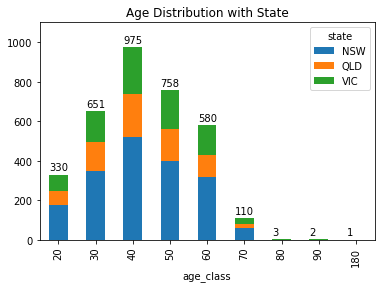

In [141]:
### age distribution and state
addr_demo_trans.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_trans.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1100])
plt.title('Age Distribution with State')
plt.show()

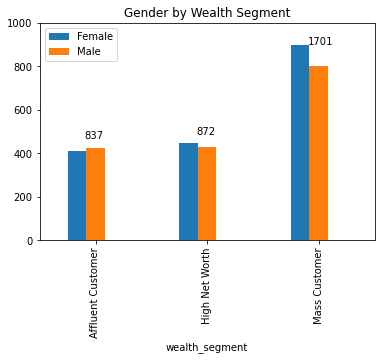

In [130]:
### Wealth Segment and gender
addr_demo_trans.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_trans.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

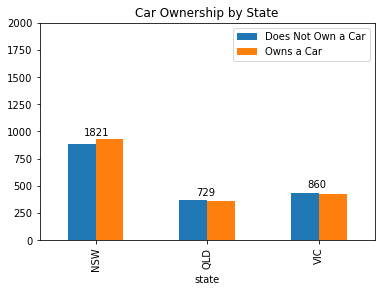

In [131]:
### Car Ownership with state
addr_demo_trans.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_trans.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 2000])
plt.title('Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()


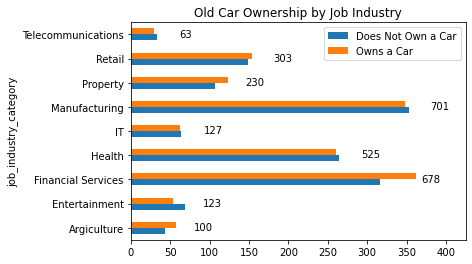

In [133]:
### Industry and car ownership
addr_demo_trans.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_trans.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

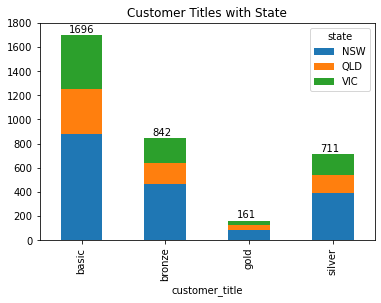

In [135]:
### Customer titles and states
addr_demo_trans.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_trans.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Titles with State')
plt.show()

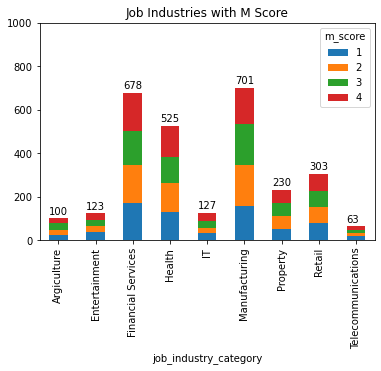

In [138]:
### Job Industry with M score
addr_demo_trans.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_trans.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

In [143]:
### Calculating purchase of bikes on last 3 years  and division by gender

c = addr_demo_trans.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

count
gender            
Female       84580
Male         82324
Unspecified     59

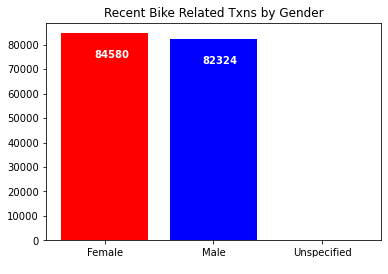

In [144]:
## creating plot for last bicycle purchase and gender
labels = ['Female', 'Male', 'Unspecified']
plt.bar(labels, c['count'], color=['red', 'blue', 'green'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

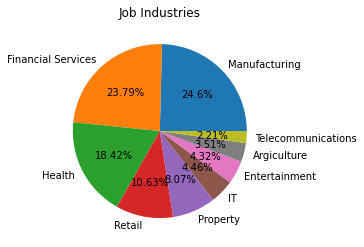

In [145]:
### calulating percentage of market share based on job industry
addr_demo_trans.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Job Industries')
plt.ylabel('')
plt.show()

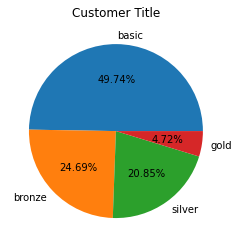

In [148]:
### Calculating number of customers based on customer title
addr_demo_trans.customer_title.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Customer Title')
plt.ylabel('')
plt.show()

In [149]:
### Calulating number of customers based on state and customer Title
c = addr_demo_trans.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
state customer_title       
NSW   basic             882
      bronze            465
      gold               85
      silver            389
QLD   basic             372
      bronze            170
      gold               38
      silver            149
VIC   basic             442
      bronze            207
      gold               38
      silver            173

In [151]:
#### calculating total number of customers based on total score
c = addr_demo_trans.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
total_score       
3              161
4              452
5              810
6             1242
7             1657
8             2073
9             2466
10            2809
11            3112
12            3410

# 7. Analysis on New Customer Dataset

In [152]:
new_cust = pd.read_excel(filename, header = 1, sheet_name = 'NewCustomerList')
new_cust.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0      Mass Customer                  N      Yes  ...    QLD  Australia   
1      Mass Customer                  N       No  ...    NSW  Australia   
2  Affluent Customer                  N       No  ...    VIC  Australia   
3  Affluent Customer                  N      Yes  ...    QLD  Australia   
4  Affluent Customer                  N       No  ...    NSW  Australia   

   property_valuation Unnamed: 16 Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0                   6        0.56      0.7000       0.8750     0.743750   
1                  11        0.89      0.8900       1.1125     0.945625   
2                   5        1.01      1.0100       1.0100     1.010000   
3                   1        0.87      1.0875       1.0875     1.087500   
4                   9        0.52      0.5200       0.6500     0.650000   

   Unnamed: 20  Rank     Value  
0            1     1  1.718750  
1            1     1  1.718750  
2            1     1  1.718750  
3            4     4  1.703125  
4            4     4  1.703125  

[5 rows x 23 columns]

In [154]:
### Identifying Null values
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [155]:
### Identifying duplicates
new_cust.duplicated().sum()

0

In [156]:
## Shape of the new data set
new_cust.shape

(1000, 23)

In [157]:
new_cust_clean = new_cust.dropna()
new_cust_clean.shape

(715, 23)

In [158]:
### Creating Age class column
new_cust_clean['age'] = (dt.datetime.now() - new_cust_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_clean['age_class'] = ((round(new_cust_clean['age'] / 10)) * 10).astype(int)
new_cust_clean.head()

<ipython-input-158-dcf431c62c8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_clean['age'] = (dt.datetime.now() - new_cust_clean['DOB']) / np.timedelta64(1, 'Y')
<ipython-input-158-dcf431c62c8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cust_clean['age_class'] = ((round(new_cust_clean['age'] / 10)) * 10).astype(int)


first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  property_valuation  \
0      Mass Customer                  N      Yes  ...                   6   
1      Mass Customer                  N       No  ...                  11   
2  Affluent Customer                  N       No  ...                   5   
3  Affluent Customer                  N      Yes  ...                   1   
4  Affluent Customer                  N       No  ...                   9   

  Unnamed: 16  Unnamed: 17 Unnamed: 18 Unnamed: 19  Unnamed: 20  Rank  \
0        0.56       0.7000      0.8750    0.743750            1     1   
1        0.89       0.8900      1.1125    0.945625            1     1   
2        1.01       1.0100      1.0100    1.010000            1     1   
3        0.87       1.0875      1.0875    1.087500            4     4   
4        0.52       0.5200      0.6500    0.650000            4     4   

      Value        age  age_class  
0  1.718750  63.312000         60  
1  1.718750  50.619063         50  
2  1.718750  46.183654         50  
3  1.703125  41.764672         40  
4  1.703125  55.117444         60  

[5 rows x 25 columns]

# 8. EDA on new data set

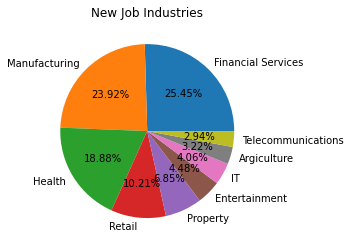

In [159]:
### Distribution of customers across job industries
new_cust_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

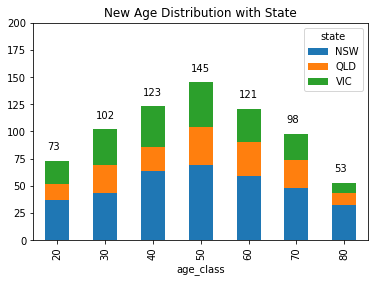

In [160]:
### Distribution of customers wrt to age and state
new_cust_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()


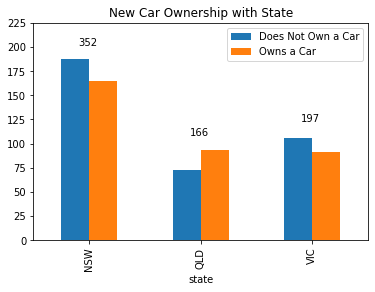

In [161]:
### Distribution of customers wrt to state and car ownership
new_cust_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

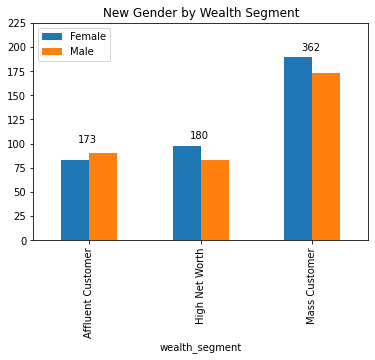

In [162]:
### Distribution of customers wrt to wealth segment and gender
new_cust_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

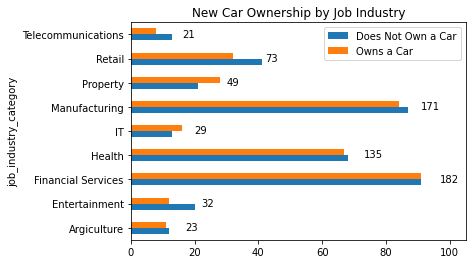

In [163]:
### Distribution of customers wrt to job industry and car ownership
new_cust_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_cust_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

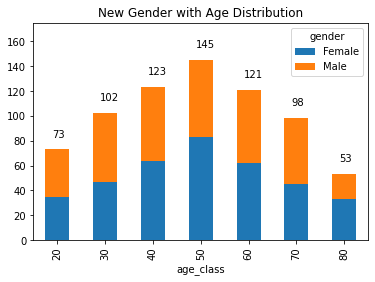

In [164]:
## Distribution of customers wrt to age and gender
new_cust_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

In [166]:
### Assigning Name to segment for each score 
addr_demo_trans['customer_segment'] = addr_demo_trans['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_demo_trans.head()

recency  frequency  monetary_value  r_score  f_score  m_score  \
customer_id                                                                  
1                7.0         11         3018.09        1        1        2   
2              128.0          3         2226.26        4        4        3   
4              195.0          2          220.57        4        4        4   
5               16.0          6         2394.94        1        2        3   
6               64.0          5         3946.55        3        3        2   

             rfm_class  total_score customer_title  gender  ...  \
customer_id                                                 ...   
1                  112            4         silver  Female  ...   
2                  443           11          basic    Male  ...   
4                  444           12          basic    Male  ...   
5                  123            6         silver  Female  ...   
6                  332            8          basic    Male  ...   

                wealth_segment owns_car tenure        age  age_class  \
customer_id                                                            
1                Mass Customer        1   11.0  67.060133         70   
2                Mass Customer        1   16.0  39.880930         40   
4                Mass Customer        0    7.0  59.084609         60   
5            Affluent Customer        1    8.0  43.475802         40   
6               High Net Worth        1   13.0  54.131736         50   

                         address  postcode  state property_valuation  \
customer_id                                                            
1             060 Morning Avenue      2016    NSW                 10   
2            6 Meadow Vale Court      2153    NSW                 10   
4             0 Holy Cross Court      4211    QLD                  9   
5            17979 Del Mar Point      2448    NSW                  4   
6               9 Oakridge Court      3216    VIC                  9   

             customer_segment  
customer_id                    
1                  Very Loyal  
2                    Inactive  
4                        Lost  
5                      Recent  
6                   High Risk  

[5 rows x 23 columns]

In [167]:
### storing top 1000 customers
top_1000 = addr_demo_trans.sort_values('rfm_class').head(1000)
top_1000.head()

recency  frequency  monetary_value  r_score  f_score  m_score  \
customer_id                                                                  
1346            15.0          9         6736.53        1        1        1   
1317            10.0          9         7024.71        1        1        1   
171             18.0          8         4833.14        1        1        1   
173             15.0          9         6549.51        1        1        1   
174             11.0         10         7628.24        1        1        1   

             rfm_class  total_score customer_title  gender  ...  \
customer_id                                                 ...   
1346               111            3           gold    Male  ...   
1317               111            3           gold    Male  ...   
171                111            3           gold  Female  ...   
173                111            3           gold  Female  ...   
174                111            3           gold  Female  ...   

                wealth_segment owns_car tenure        age  age_class  \
customer_id                                                            
1346             Mass Customer        0   19.0  50.375327         50   
1317             Mass Customer        1    5.0  47.790743         50   
171              Mass Customer        0   10.0  49.915359         50   
173          Affluent Customer        0    1.0  23.834057         20   
174              Mass Customer        0   12.0  30.936188         30   

                          address  postcode  state property_valuation  \
customer_id                                                             
1346         5 Springview Terrace      3620    VIC                  4   
1317          58563 Monterey Hill      4300    QLD                  2   
171          13950 Jackson Avenue      2099    NSW                 11   
173                 2 Randy Point      2766    NSW                  8   
174             6898 Redwing Park      2148    NSW                  9   

             customer_segment  
customer_id                    
1346                 Platinum  
1317                 Platinum  
171                  Platinum  
173                  Platinum  
174                  Platinum  

[5 rows x 23 columns]

In [169]:
### store these 1000 customers in a excel
writer = pd.ExcelWriter('kpmg_cleaned_data.xlsx',
                        engine = 'xlsxwriter')
addr_demo_trans.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()

In [180]:
addr_demo_trans.groupby('customer_segment').agg({'gender': lambda x: len(x)})['gender']

customer_segment
Average           415
Becoming Loyal    358
Evasive           393
High Risk         416
Inactive          303
Losing            343
Lost              298
Platinum          161
Recent            432
Very Loyal        291
Name: gender, dtype: int64

In [174]:
new_cust_clean.groupby('age_class').agg({'gender': lambda x: len(x)})['gender']

age_class
20     73
30    102
40    123
50    145
60    121
70     98
80     53
Name: gender, dtype: int64